## Import Library

In [ ]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

## Import CSV as Dataframe

In [ ]:
# Read in the Netflix CSV as a Dataframe
netflix_df = pd.read_csv("/content/drive/MyDrive/project/Portofolio/workspace/netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


## Subset for type media as movie and release year in 1990s

In [ ]:
#Subset for movies only
netflix_movies_df = netflix_df.loc[netflix_df["type"] == "Movie"]
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [ ]:
#Subset for 1990s
movies_90s = netflix_movies_df.loc[(netflix_movies_df["release_year"] >= 1990) & (netflix_movies_df['release_year'] <= 1999)]
movies_90s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


## Showing chart of movies

### Counts per year

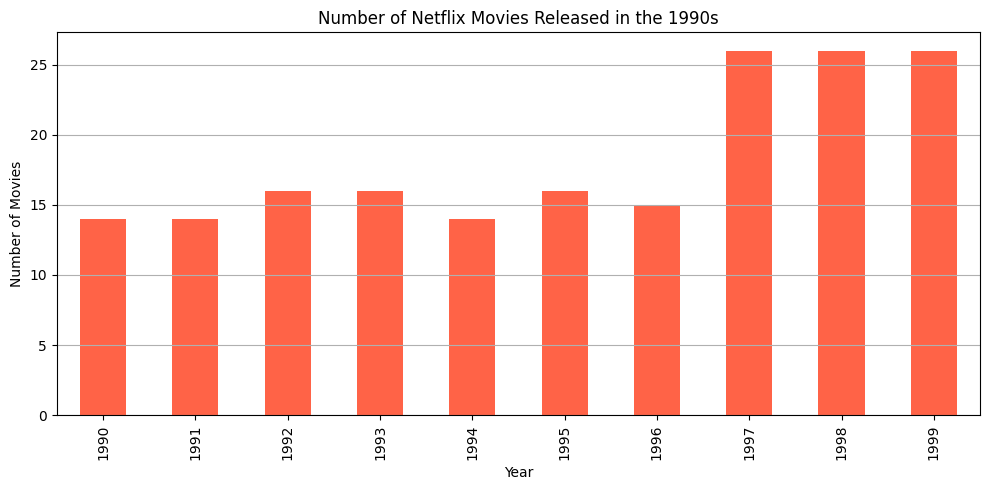

In [ ]:
# Bar chart of movie counts per year

movies_per_year = movies_90s['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
movies_per_year.plot(kind='bar', color='tomato')
plt.title('Number of Netflix Movies Released in the 1990s')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("movies_by_year.png")
plt.show()


### Showing top genres

/tmp/ipython-input-149612177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_90s['genre'] = movies_90s['genre'].fillna('')


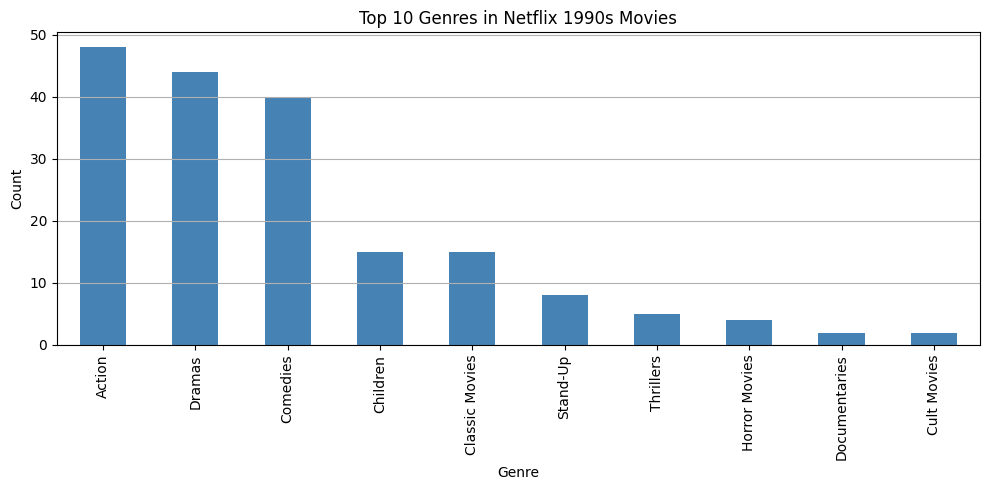

In [ ]:
# Bar chart showing top genres
from collections import Counter
import pandas as pd

genre_counts = Counter()
movies_90s['genre'] = movies_90s['genre'].fillna('')
for genres in movies_90s['genre']:
    for g in [genre.strip() for genre in genres.split(',') if genre.strip()]:
        genre_counts[g] += 1

genre_series = pd.Series(genre_counts).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
genre_series.plot(kind='bar', color='steelblue')
plt.title('Top 10 Genres in Netflix 1990s Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("top_genres.png")
plt.show()


### Showimg durations of movies in mins

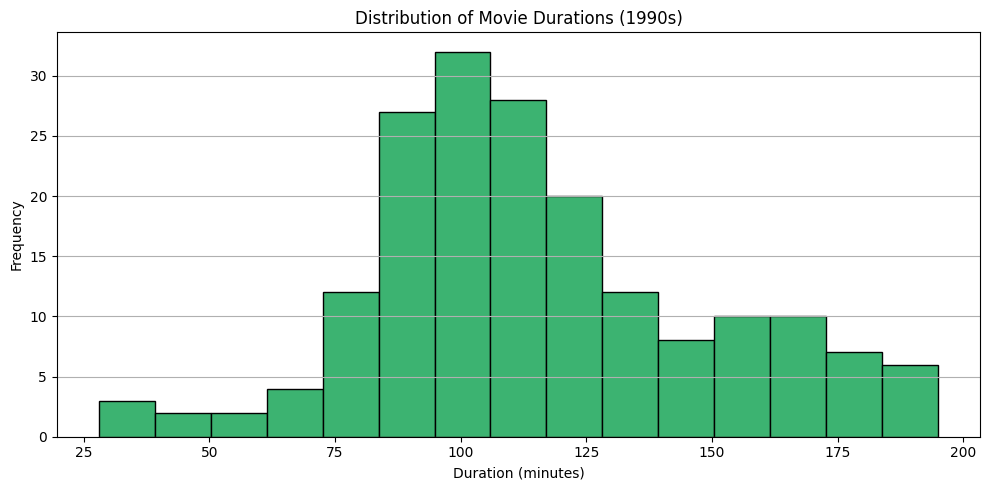

In [ ]:
# Histogram of Durations
movies_90s_copy = movies_90s.copy()
movies_90s_copy['duration_minutes'] = movies_90s_copy['duration'].astype(str).str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
movies_90s_copy['duration_minutes'].dropna().plot(kind='hist', bins=15, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Movie Durations (1990s)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("duration_distribution.png")
plt.show()